# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_reponse = requests.get(btc_url).json()
btc_price = btc_reponse['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_reponse = requests.get(eth_url).json()
eth_price = eth_reponse['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance output
print(f"The current value of your {my_btc_value}")
print(f"The current value of your {my_eth_value}")

The current value of your 22389.275999999998
The current value of your 2957.6119999999996


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
SPY = 50
AGG = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
from datetime import datetime
startdate = datetime.now()
today = pd.Timestamp('2020-11-17', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investment = alpaca.get_barset(tickers, timeframe, start = today).df

# Preview DataFrame
df_investment.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-11-17 00:00:00-05:00  117.75  117.90  117.75  117.870  3701335  359.97   
2020-11-18 00:00:00-05:00  117.95  117.99  117.89  117.965  4880892  360.91   
2020-11-19 00:00:00-05:00  118.08  118.26  118.03  118.180  5807639  355.61   
2020-11-20 00:00:00-05:00  118.19  118.34  118.13  118.290  5496191  357.50   

                                                             
                             high     low   close    volume  
time                                                         
2020-11-17 00:00:00-05:00  361.92  358.34  360.64  54021793  
2020-11-18 00:00:00-05:00  361.50  356.24  356.29  57605438  
2020-11-19 00:00:00-05:00  358.18  354.15  357.76  47610697  
2020-11-20 00:00:00-05:00  357.72  355.25  355.34  47947194

In [11]:
# Pick AGG and SPY close prices
AGG_close_price = round(df_investment[tickers[0]]['close'][0],2)
SPY_close_price = round(df_investment[tickers[1]]['close'][0],2)

# Print AGG and SPY close prices
print("Current price AGG",AGG_close_price)
print("Current price SPY",SPY_close_price)

Current price AGG 117.87
Current price SPY 360.64


In [12]:
# Compute the current value of shares
AGG_value = AGG * AGG_close_price
SPY_value = SPY * SPY_close_price

# Print current value of share
print(f"Current Value AGG ${AGG_value}")
print(f"Current Value SPY ${SPY_value}")

Current Value AGG $23574.0
Current Value SPY $18032.0


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [
    my_btc_value+my_eth_value,
    AGG_value+SPY_value
]

# Display savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['Amount'],index=['crypto','shares'])
df_savings

,Amount
crypto,25346.888
shares,41606.000


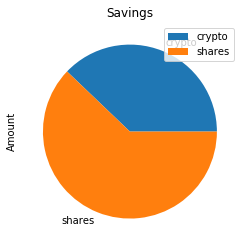

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount',title='Savings');

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
print(f"Total Savings ${total_savings}")


Total Savings $66952.888


In [16]:
# Validate saving health
if total_savings > emergency_fund:
    print("You have enough money in emergency fund!")
elif total_savings > emergency_fund:
    print("You have reached financial goal!")
else:
    print("You are "+str(emergency_fund-total_savings)+" from financial goals")

You have enough money in emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
df_spyAgg_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date,
    end = end_date
).df

df_spyAgg_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_spyAgg_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003480,1.007931,0.997968,1.000297,0.995270,0.999021,1.000430,0.995366,0.988621,1.004373,...,1.020214,1.006137,1.003247,0.998172,1.007353,0.991408,0.994143,1.002560,0.995245,1.002983
2,1.018824,0.990485,0.995697,0.997907,0.994263,0.992269,1.001305,0.994604,0.987794,1.003615,...,1.017370,1.005010,1.009526,0.997768,1.009151,0.992394,0.993182,1.018275,0.992249,0.998869
3,1.014195,0.986888,0.991448,0.998954,0.998352,1.003476,0.994445,0.994118,0.976251,0.998739,...,1.016167,1.005040,0.996019,0.996290,1.019339,1.000773,1.007235,1.026019,0.991897,0.997457
4,1.012855,0.992336,0.978406,1.006308,0.998300,1.012248,0.994761,0.991444,0.978748,0.998402,...,1.028051,1.007899,0.995074,0.994867,1.014572,1.001456,0.997662,1.030736,0.985008,0.995405
5,1.005494,1.001012,0.975885,1.000634,0.992661,1.012033,0.997523,0.981175,0.989403,0.995546,...,1.034888,1.012821,0.986843,1.000493,1.003198,0.999921,1.003671,1.036548,0.974187,0.988481
6,0.995985,0.999052,0.979209,0.988840,0.988078,1.008855,0.996242,0.978459,0.974853,0.997455,...,1.041918,1.023850,0.983591,1.004879,1.007092,1.010318,0.996468,1.015904,0.990543,0.982853
7,1.008977,1.011251,0.980810,0.994471,0.981943,0.994960,1.013426,0.984959,0.973321,1.002730,...,1.039829,1.025590,0.986746,1.014895,1.011222,1.003115,0.996711,1.017442,0.987647,0.986089
8,1.014175,1.007127,0.985640,1.003888,0.989626,0.976984,1.017479,0.993758,0.985234,1.001306,...,1.039430,1.030586,0.985871,1.010483,1.012568,0.991982,0.997333,1.018759,0.989221,0.986170
9,0.991988,1.001929,0.984911,0.997177,0.986162,0.984168,1.017381,0.999285,0.989841,1.009686,...,1.043263,1.037884,0.983804,0.995397,1.018662,1.000185,0.986298,1.001249,1.000748,0.988422


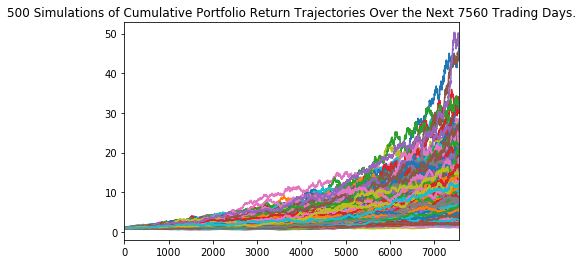

In [22]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

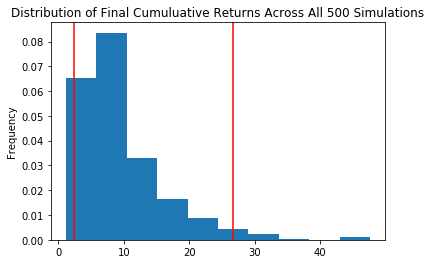

In [23]:
# Plot probability distribution and confidence intervals
distribute_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
statsMc = MC_thirty_year.summarize_cumulative_return()
statsMc

count           500.000000
mean              9.663135
std               6.600165
min               1.153462
25%               5.233683
50%               7.874960
75%              12.100348
max              47.594391
95% CI Lower      2.335743
95% CI Upper     26.654960
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(statsMc[-2] * initial_investment,2) 
ci_upper = round(statsMc[-1] * initial_investment,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46714.86 and $533099.2


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(statsMc[-2] * initial_investment,2) 
ci_upper = round(statsMc[-1] * initial_investment,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70072.28 and $799648.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_spyAgg_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997720,0.994554,0.990238,0.998018,0.999247,1.002036,0.979828,1.006197,0.984399,0.999753,...,1.002346,0.994563,1.002665,1.000887,1.002682,1.012904,0.999120,0.997499,0.993492,0.971181
2,1.021319,0.984954,0.976191,0.998552,1.002747,1.006069,0.985731,0.978864,0.979088,1.009480,...,1.014610,0.998751,1.013684,1.004598,1.001893,1.023437,1.003180,1.011460,0.998507,0.972183
3,1.028555,0.974119,0.973755,1.002254,1.021273,1.007474,0.977048,0.963706,0.975348,1.027586,...,1.014885,0.998604,1.026739,1.011005,0.990475,1.004941,1.011082,1.011748,0.979791,0.973569
4,1.041156,0.976916,0.960170,1.011186,1.036629,1.018794,0.991852,0.963204,0.966234,1.024264,...,1.012610,1.002430,1.014715,1.020442,0.984152,1.002358,1.002585,1.007626,0.968000,0.968023
5,1.048013,0.978223,0.967928,1.021508,1.025688,1.011670,0.987591,0.963574,0.963613,1.003551,...,1.027521,1.006500,1.015743,1.014388,0.983656,0.996557,0.983432,0.995411,0.966435,0.954105
6,1.050224,0.982635,0.981541,1.028815,1.022025,1.018253,0.993510,0.946017,0.965713,1.015440,...,1.013422,0.998015,1.005585,1.005008,1.002056,0.991779,0.982656,0.997221,0.981322,0.948750
7,1.059629,0.982550,0.987520,1.037043,1.018113,1.009592,0.981851,0.939715,0.968918,1.006923,...,1.000436,1.005607,1.003420,1.013244,1.008075,1.001177,0.997707,0.987918,0.982222,0.952652
8,1.060694,0.998354,0.981149,1.037739,1.015627,1.017531,0.982312,0.938368,0.961201,1.016466,...,1.003506,1.022311,0.995568,1.024987,1.013552,0.994458,1.005659,0.983217,0.972689,0.943733
9,1.054265,0.994811,0.986976,1.055498,1.016669,1.038869,0.990823,0.929691,0.962829,1.017303,...,1.015113,1.039509,1.019356,1.009432,0.999108,0.970560,0.996089,0.967787,0.978257,0.938337


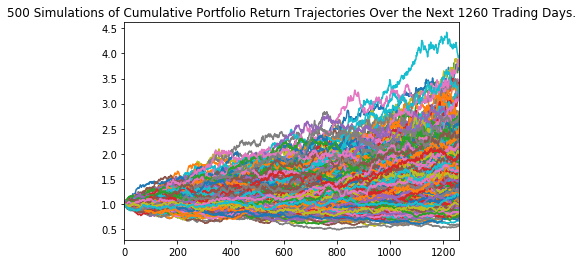

In [29]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

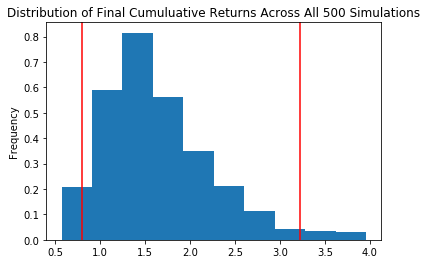

In [30]:
# Plot probability distribution and confidence intervals
distribute_plot = MC_five_year.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
statsMcFive = MC_five_year.summarize_cumulative_return()
statsMcFive

count           500.000000
mean              1.642849
std               0.604473
min               0.571406
25%               1.205723
50%               1.540461
75%               1.965428
max               3.955883
95% CI Lower      0.799349
95% CI Upper      3.219710
Name: 1260, dtype: float64

In [32]:
# Set initial investment
initial_investment_60k = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(statsMcFive[-2] * initial_investment_60k,2) 
ci_upper_five = round(statsMcFive[-1] * initial_investment_60k,2) 
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $47960.95 and $193182.6


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_spyAgg_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983518,1.004151,1.020922,1.003259,1.021356,1.000789,1.011106,0.992401,0.993049,1.001755,...,1.000113,1.009220,0.988430,0.990777,0.997072,0.999870,1.011131,0.991885,1.018298,1.013244
2,0.979279,1.019458,1.027882,1.007806,1.017859,1.006097,1.027396,0.997008,0.990307,0.986934,...,1.017638,1.019764,0.976519,0.994012,1.006778,1.011031,1.008125,0.978269,1.013025,1.014370
3,0.994103,0.996172,1.016124,1.001928,1.013242,1.022970,1.035071,0.989924,0.993557,0.979162,...,1.011881,1.016460,0.967885,0.993232,0.999748,1.013950,1.000196,0.988246,1.010220,1.011178
4,0.997462,0.993739,1.019079,0.996764,1.041392,1.019246,1.032020,0.998102,0.992906,0.977571,...,1.014769,1.008812,0.965051,0.994142,0.989029,1.016521,0.996063,0.995884,1.017632,0.985270
5,1.011170,0.978191,1.019553,0.995019,1.026999,1.017726,1.027711,1.015000,1.000711,0.992721,...,0.998767,1.016252,0.963078,1.005011,0.977022,1.015940,0.993520,0.996630,1.033943,0.989667
6,1.012570,0.984555,1.040385,0.980153,1.027341,1.012651,1.030174,1.011194,0.990448,0.998815,...,0.989051,1.019837,0.963564,1.020581,0.980854,1.029895,1.006451,1.001467,1.029731,0.988694
7,1.005689,0.974871,1.048515,0.989608,1.021404,1.016714,1.037905,1.008828,0.979325,0.994420,...,0.996913,1.026056,0.971532,1.023760,0.967069,1.040626,0.996517,1.008888,1.016208,1.003294
8,0.998874,0.970306,1.058874,0.995967,1.003509,1.014536,1.029001,1.014033,0.979221,1.014078,...,1.005760,1.034168,0.961203,1.012979,0.972510,1.054006,0.997852,1.011370,1.009519,1.015818
9,0.993313,0.972950,1.046976,0.992630,1.002749,1.012427,1.041176,1.029395,0.985797,1.021328,...,1.004359,1.023957,0.966967,1.009066,0.965525,1.050516,1.005222,1.017874,1.015390,1.015602


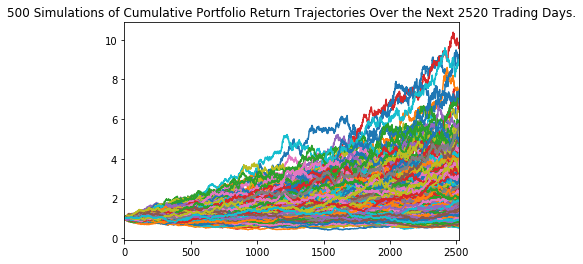

In [35]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

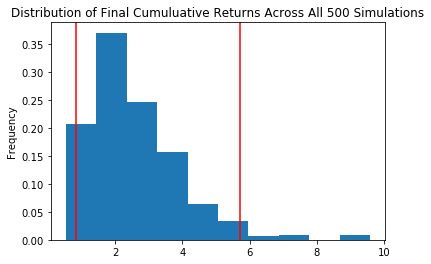

In [36]:
# Plot probability distribution and confidence intervals
distribute_plot = MC_ten_year.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
statsMcTen = MC_ten_year.summarize_cumulative_return()
statsMcTen

count           500.000000
mean              2.563101
std               1.364725
min               0.528896
25%               1.647384
50%               2.273988
75%               3.249345
max               9.583107
95% CI Lower      0.821647
95% CI Upper      5.716397
Name: 2520, dtype: float64

In [38]:
# Set initial investment
initial_investment_60k = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(statsMcTen[-2] * initial_investment_60k,2) 
ci_upper_ten = round(statsMcTen[-1] * initial_investment_60k,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $49298.84 and $342983.84
